- criterion : 분할 품질을 측정하는 기능(default : gini)
- splitter : 각 노드에서 분할을 선택하는 데 사용되는 전략(default : best)
- max_depth : 트리의 최대 깊이(값이 클수록 모델의 복잡도가 올라간다.)
- min_samples_split : 자식 노드를 분할하는데 필요한 최소 샘플 수 (default : 2)
- min_samples_leaf : 리프 노드에 있어야 할 최소 샘플 수 (default : 1)
- min_weight_fraction_leaf : min_sample_leaf와 같지만 가중치가 부여된 샘플 수에서의 비율
- max_features : 각 노드에서 분할에 사용할 특징의 최대 수
- random_state : 난수 seed 설정
- max_leaf_nodes : 리프 노드의 최대 수
- min_impurity_decrease : 최소 불순도
- min_impurity_split : 나무 성장을 멈추기 위한 임계치
- class_weight : 클래스 가중치
- presort : 데이터 정렬 필요 여부

In [19]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [20]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [21]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [22]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [28]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


- overfitting

- 모델을 그림으로 표현하기

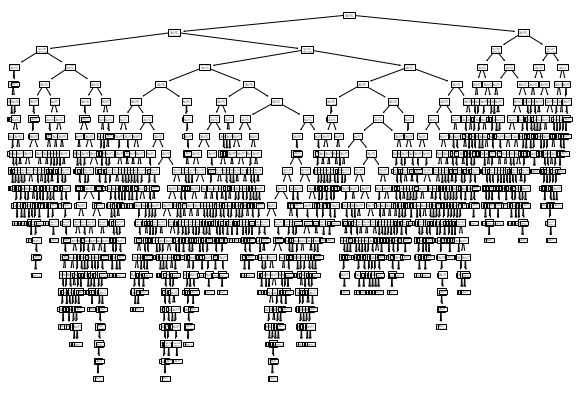

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

- 트리의 깊이 제한하기
- max_depth : 1로 주면 루트 노드를 제외하고 하나의 노드를 더 확장하여 그린다.
- filled : 클래스에 맞게 노드의 색을 칠할 수 있다.
- feature_names : 특성의 이름 전달 가능

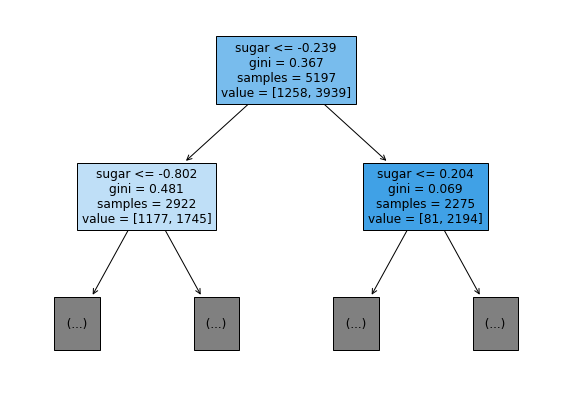

In [26]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

- gini : 불순도
- value : 클래스별 샘플 수(음성 클래스는 레드 와인, 양성 클래스는 화이트 와인)
- 어떤 클래스의 비율이 높아지면 점점 진한 색으로 표시

#### Gini impurity(지니 불순도)
- DecisionTreeClssifier 클래스의 criterion 매개변수의 기본값이 'gini'
- criterion : 노드에서 데이터를 분할할 기준
- 지니 불순도 = 1 - (음성 클래스 비율^2 + 양성 클래스 비율^2)

- 결정 트리 모델은 부모 노드와 자식 노드의 불순도 차이가 가능한 크도록 트리를 성장시킨다.
- 부모의 불순도 - (왼쪽 노드 샘플 수 / 부모의 샘플 수 ) x 왼쪽 노드 불순도 - (오른쪽 노드 샘플 수 / 부모의 샘플 수) x 오른쪽 노드 불순도
- 정보 이득(information gain) : 부모와 자식 노드 사이의 불순도 차이
- 정보 이득이 최대가 되도록 데이터를 나눈다

#### entropy 불순도 사용
- 노드의 클래스 비율을 제곱이 아니라 밑이 2인 로그를 사용하여 곱함

#### 가지치기
- 가장 간단한 방법은 트리의 최대 깊이를 지정하는 것

In [29]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


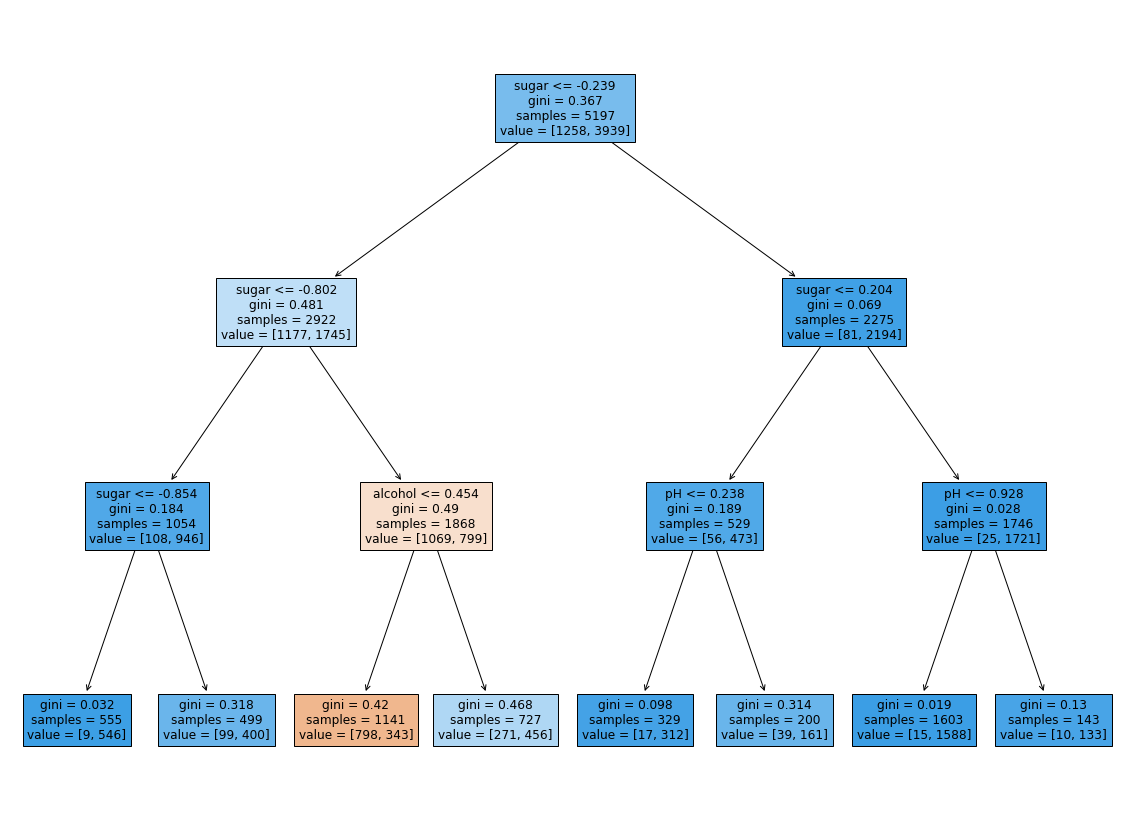

In [30]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

- 특성값의 스케일은 결정 트리 알고리즘에 영향을 미치지 않는다. 따라서 표준화 전처리를 할 필요가 없다.

In [31]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


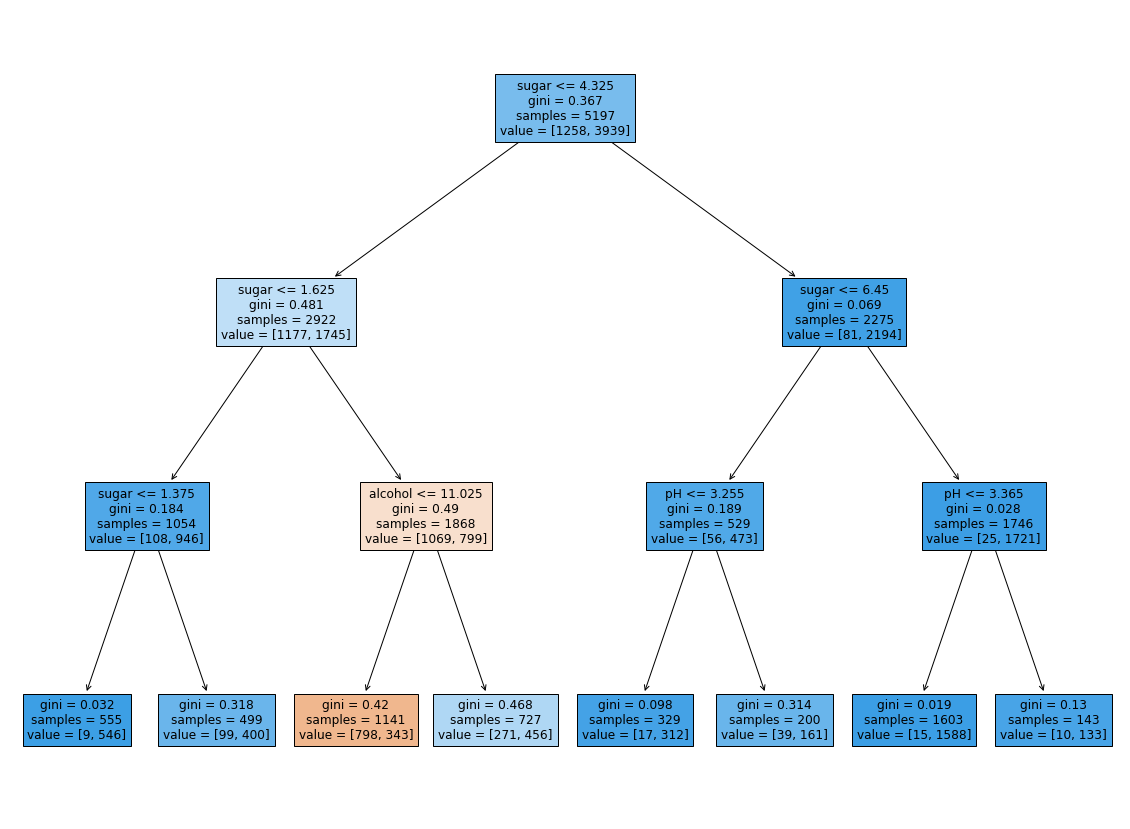

In [32]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

- 당도가 1.625보다 크고 4.325보다 작은 와인 중에 알코올 도수가 11.025와 같거나 작은 것이 레드 와인으로 예측.

In [33]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


- 특성 중요도 : 어떤 특성이 가장 유용한지 나타냄
- 두 번째 특성(sugar)가 약 0.87로 특성 중요도가 가장 높다
- 모두 더하면 1

### max_depth 매개변수를 사용한 하이퍼파라미터 튜닝

#### 검증 세트

In [34]:
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [35]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [37]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.8625


- overfitting
- 매개변수를 바꿔서 더 좋은 모델 찾기

### cross validation

In [39]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target) # 기본적으로 5-fold cross validation 수행
print(scores)

{'fit_time': array([0.02235103, 0.01435423, 0.01544881, 0.01615882, 0.01642275]), 'score_time': array([0.        , 0.        , 0.        , 0.        , 0.00139499]), 'test_score': array([0.87403846, 0.84711538, 0.87391723, 0.85466795, 0.83830606])}


- 교차 검증의 최종 점수는 test_score 키에 담긴 5개의 점수를 평균하여 얻을 수 있다.

In [41]:
import numpy as np
print(np.mean(scores['test_score']))

0.8576090175464574


In [42]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855878248315688


In [44]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # 10-fold cross validation
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8583826144953314


#### GridSearchCV : 하이퍼파라미터 탐색과 교차 검증을 한 번에 수행

- min_impurity_decrease(최소 불순도) 매개변수의 최적값 찾기
- 탐색할 매개변수와 탐색할 값의 리스트를 딕셔너리로 만들기

In [45]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease':[0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

- GridSearchCV 클래스에 탐색 대상 모델과 params 변수를 전달하여 그리드 서치 객체 만들기

In [46]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

In [47]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

- min_impurity_decrease 값을 바꿔가며 총 5번 실행
- GridSearchCV의 cv 매개변수 기본값은 5 ( 5x5=25개 모델 훈련)
- n_jobs : 병렬 실행에 사용할 CPU 코어 수를 지정(기본 값 1, -1로 지정하여 시스템에 있는 모든 코어 사용)

In [48]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


- 25개 모델 중에서 검증 점수가 가장 높은 모델의 매개변수 조합으로 전체 훈련세트에서 자동으로 다시 모델을 훈련
- best_estimator 속성에 저장되어 있음

In [49]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [50]:
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


- 각 매개변수에서 수행한 교차 검증의 평균 점수

In [51]:
best_index = np.argmax(gs.cv_results_['mean_test_score']) # 가장 큰 값의 인덱스 추출
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


In [53]:
params = {'min_impurity_decrease' : np.arange(0.0001, 0.001, 0.0001),
          # range는 정수만 사용가능 
         'max_depth':range(5,20,1),
         'min_samples_split':range(2,100,10)}
# 검증 횟수 : 9 x 15 x 10 =1350개
# 5-fold 교차검증 : 5 x 1350 = 6750

In [54]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [55]:
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [56]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


#### Random Search(랜덤 서치)
- 매개변수 값의 목록을 전달하는 것이 아니라 매개변수를 샘플링할 수 있는 확률 분포 객체를 전달

In [57]:
from scipy.stats import uniform, randint

In [58]:
rgen = randint(0,10)
rgen.rvs(10)

array([7, 2, 2, 6, 7, 4, 7, 6, 8, 9])

In [59]:
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 95,  95,  98, 104, 106, 105, 104,  98, 103,  92], dtype=int64))

In [60]:
ugen = uniform(0, 1)
ugen.rvs(10)

array([0.45479727, 0.98430264, 0.31118312, 0.10398959, 0.49355546,
       0.9609516 , 0.24382507, 0.2947881 , 0.74829503, 0.82618636])

In [61]:
params = {'min_impurity_decrease' : uniform(0.0001, 0.001),
         'max_depth':randint(20,50),
         'min_samples_split':randint(2,25),
         'min_samples_leaf':randint(1,25),}

In [63]:
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023CC58973A0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023CC6EF8940>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023CC58971C0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023CC6EF82E0>},
                   random_state=42)

In [64]:
print(gs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [65]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8695428296438884


In [66]:
dt = gs.best_estimator_
print(dt.score(test_input, test_target))

0.86
